In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.signal as signal


In [2]:
# =========LOAD PPO data===============
file_path = 'PPO_High_rewards.csv'  # Replace with your file path
data = pd.read_csv(file_path)

rewards_steps_PPO = data.iloc[:, 1]  # Second column (Step)
rewards_PPO = data.iloc[:, 2]  # Third column (Value)

file_path = 'PPO_High_loss.csv'  # Replace with your file path
data = pd.read_csv(file_path)

values_steps_PPO = data.iloc[:, 1]  # Second column (Step)
values_PPO = data.iloc[:, 2]  # Third column (Value)

# =========LOAD A2C data===============

file_path = 'A2C_High_rewards.csv'  # Replace with your file path
data = pd.read_csv(file_path)

rewards_steps_A2C = data.iloc[:, 1]  # Second column (Step)
rewards_A2C = data.iloc[:, 2]  # Third column (Value)

file_path = 'A2C_High_loss.csv'  # Replace with your file path
data = pd.read_csv(file_path)

values_steps_A2C = data.iloc[:, 1]  # Second column (Step)
values_A2C = data.iloc[:, 2]  # Third column (Value)
# rewards_steps_A2C = rewards_steps_PPO  # Second column (Step)
# rewards_A2C = np.random.randint(min(rewards_PPO), max(rewards_PPO), len(rewards_PPO))  # Third column (Value)
# values_steps_A2C = values_steps_PPO  # Second column (Step)
# values_A2C = np.random.randint(min(values_PPO), max(values_PPO), len(values_PPO))  # Third column (Value)

In [3]:
sampling_rate = 100  # Sampling rate (samples per second)
cutoff_frequency = 1  # Cutoff frequency (in Hz), for example, 1 Hz
nyquist = 0.8 * sampling_rate  # Nyquist frequency
normal_cutoff = cutoff_frequency / nyquist  # Normalize cutoff frequency

# Design the low-pass Butterworth filter
order = 2  # Filter order (higher means steeper rolloff)
b, a = signal.butter(order, normal_cutoff, btype='low')

# Step 3: Apply the low-pass filter to the noisy signal
rewards_PPO_filtered = signal.filtfilt(b, a, rewards_PPO)
rewards_A2C_filtered = signal.filtfilt(b, a, rewards_A2C)
values_PPO_filtered = signal.filtfilt(b, a, values_PPO)
values_A2C_filtered = signal.filtfilt(b, a, values_A2C)

In [4]:
rewards_PPO_filtered

array([7390.85708002, 7389.91935296, 7389.04383937, 7388.23326784,
       7387.49018053, 7386.81685222, 7386.21534922, 7385.68757585,
       7385.23533201, 7384.86034503, 7384.56411656, 7384.34765055,
       7384.21132874, 7384.15509889, 7384.17866415, 7384.28140351,
       7384.46238074, 7384.72053815, 7385.05479093, 7385.46400856,
       7385.94720898, 7386.50432518, 7387.13674564, 7387.8467785 ,
       7388.63703059, 7389.51036519, 7390.46974017, 7391.51788431,
       7392.65731815, 7393.89046422, 7395.21949419, 7396.64621322,
       7398.17210557, 7399.79834611, 7401.52579977, 7403.35505059,
       7405.28637365, 7407.31963794, 7409.45426233, 7411.68930338,
       7414.02370978, 7416.45686227, 7418.98930667, 7421.62300006,
       7424.36064772, 7427.20485858, 7430.15783992, 7433.22141271,
       7436.39702205, 7439.68572223, 7443.08809875, 7446.60416593,
       7450.23334465, 7453.97449351, 7457.82596186, 7461.78562428,
       7465.85084107, 7470.01848059, 7474.28511992, 7478.64719

In [5]:
# # Step 4: Plot the original, noisy, and filtered signals
# plt.figure(figsize=(10, 6))
# plt.plot(rewards_steps_PPO, rewards_PPO, linestyle='-', color='b', alpha = 0.3, linewidth=0.7)
# plt.plot(rewards_steps_PPO, rewards_PPO_filtered, linestyle='-', color='b', label='PPO', linewidth=4)
# # plt.plot(rewards_steps_A2C, rewards_A2C, linestyle='-', color='r', alpha = 0.3, linewidth=0.7)
# # plt.plot(rewards_steps_A2C, rewards_A2C_filtered, linestyle='-', color='r', label='A2C', linewidth=4)
# plt.legend()
# plt.title("Rollout rewards")
# plt.xlabel("Timesteps")
# plt.ylabel("Rewards")
# plt.savefig('Rewards')
# plt.show()

In [6]:
# # Step 4: Plot the original, noisy, and filtered signals
# plt.figure(figsize=(10, 6))
# plt.plot(values_steps_PPO, values_PPO, linestyle='-', color='b', alpha = 0.3, linewidth=0.7)
# plt.plot(values_steps_PPO, values_PPO_filtered, linestyle='-', color='b', label='PPO', linewidth=4)
# # plt.plot(values_steps_A2C, values_A2C, linestyle='-', color='r', alpha = 0.3, linewidth=0.7)
# # plt.plot(values_steps_A2C, values_A2C_filtered, linestyle='-', color='r', label='A2C', linewidth=4)
# plt.legend()
# plt.title("Rollout Value Loss")
# plt.xlabel("Timesteps")
# plt.ylabel("Value Loss")
# plt.savefig('ValueLoss')
# plt.show()

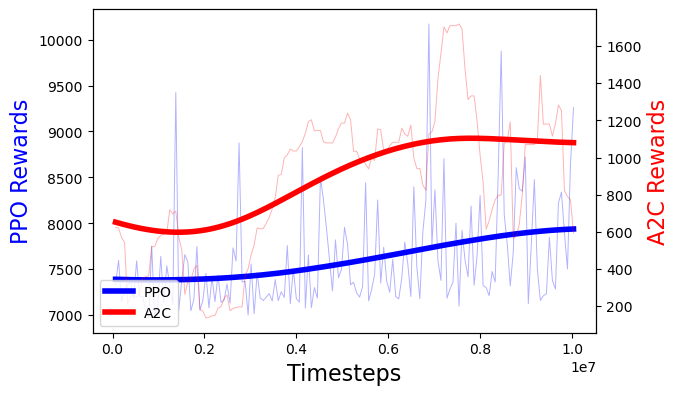

In [7]:
# import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6.5, 4.2))

# Plot for PPO on the primary y-axis
ax1.plot(rewards_steps_PPO, rewards_PPO, linestyle='-', color='b', alpha=0.3, linewidth=0.7)
ax1.plot(rewards_steps_PPO, rewards_PPO_filtered, linestyle='-', color='b', label='PPO', linewidth=4)
ax1.set_xlabel("Timesteps", fontsize=16)
ax1.set_ylabel("PPO Rewards", color='b', fontsize=16)
ax1.tick_params(axis='y', labelcolor='k')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(rewards_steps_A2C, rewards_A2C, linestyle='-', color='r', alpha=0.3, linewidth=0.7)
ax2.plot(rewards_steps_A2C, rewards_A2C_filtered, linestyle='-', color='r', label='A2C', linewidth=4)
ax2.set_ylabel("A2C Rewards", color='r', fontsize=16)
ax2.tick_params(axis='y', labelcolor='k')

# Add a single legend for both plots
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left')

# Add title and save the plot
# plt.title("Rollout Rewards")
plt.savefig('Rewards.png')
plt.show()


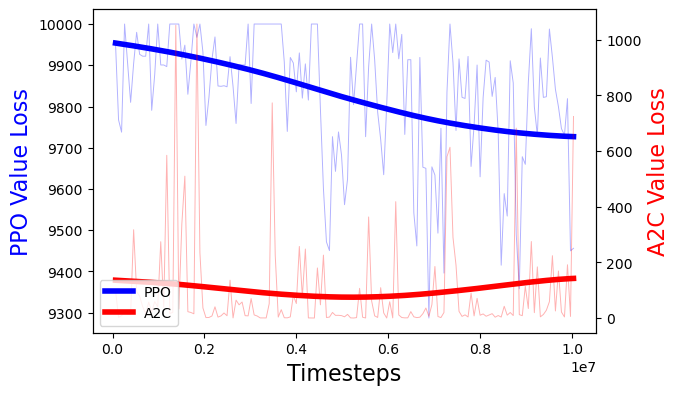

In [8]:
# import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6.5, 4.2))

# Plot for PPO on the primary y-axis
ax1.plot(values_steps_PPO, values_PPO, linestyle='-', color='b', alpha=0.3, linewidth=0.7)
ax1.plot(values_steps_PPO, values_PPO_filtered, linestyle='-', color='b', label='PPO', linewidth=4)
ax1.set_xlabel("Timesteps", fontsize=16)
ax1.set_ylabel("PPO Value Loss", color='b', fontsize=16)
ax1.tick_params(axis='y', labelcolor='k')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(values_steps_A2C, values_A2C, linestyle='-', color='r', alpha=0.3, linewidth=0.7)
ax2.plot(values_steps_A2C, values_A2C_filtered, linestyle='-', color='r', label='A2C', linewidth=4)
ax2.set_ylabel("A2C Value Loss", color='r', fontsize=16)
ax2.tick_params(axis='y', labelcolor='k')

# Add a single legend for both plots
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left')

# Add title and save the plot
# plt.title("Rollout Rewards")
plt.savefig('Loss.png')
plt.show()
